# Getting a list of movies
------

In [ ]:
import pandas as pd

In [ ]:
# Adjust these file paths according to where you've saved the downloaded datasets
basics_path = '/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/Data/IMDb title basics.tsv'
ratings_path = '/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/Data/IMDb Title Ratings.tsv'

In [ ]:
# Reading the basics file with the correct column names
basics_df = pd.read_csv(
    basics_path, 
    sep='\t', 
    low_memory=False, 
    usecols=['tconst', 'titleType', 'primaryTitle', 'genres', 'isAdult', 'startYear', 'runtimeMinutes']
)

In [ ]:
# Filtering for movies
movies_df = basics_df[basics_df['titleType'] == 'movie']

In [ ]:
# Reading the ratings file
ratings_df = pd.read_csv(ratings_path, sep='\t', usecols=['tconst', 'averageRating', 'numVotes'])

# Merging the datasets on 'tconst' to combine movie details with ratings
merged_df = pd.merge(movies_df, ratings_df, on='tconst')

# Selecting and renaming the columns
IMDb_movies_df = merged_df[['primaryTitle', 'genres', 'averageRating', 'startYear', 'isAdult', 'runtimeMinutes', 'numVotes']]
IMDb_movies_df.columns = ['Movie Name', 'Genre', 'Rating', 'Release Date', 'isAdult', 'Runtime Minutes', 'numVotes']

In [ ]:
# Remove all values from Release date that are not numeric
IMDb_movies_df = IMDb_movies_df[IMDb_movies_df['Release Date'].str.isnumeric()]

In [ ]:
# set datatypes for IMDb_movies_df
IMDb_movies_df['Release Date'] = IMDb_movies_df['Release Date'].astype('int')
IMDb_movies_df['Runtime Minutes'] = IMDb_movies_df['Runtime Minutes'].apply(pd.to_numeric, errors='coerce')
IMDb_movies_df['numVotes'] = IMDb_movies_df['numVotes'].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Filter IMDb_movies_df for Release date > 2015
IMDb_movies_df = IMDb_movies_df[IMDb_movies_df['Release Date'] > 2015]

# Remove all num values from Genre column
IMDb_movies_df['Genre'] = IMDb_movies_df['Genre'].str.replace(r'\d+', '')

In [ ]:
# Remove all values from IMDb_movies_df columns that have a value /N
IMDb_movies_df = IMDb_movies_df[IMDb_movies_df['Movie Name'] != '\\N']
IMDb_movies_df = IMDb_movies_df[IMDb_movies_df['Rating'] != '\\N']
IMDb_movies_df = IMDb_movies_df[IMDb_movies_df['isAdult'] != '\\N']
IMDb_movies_df = IMDb_movies_df[IMDb_movies_df['Runtime Minutes'] != '\\N']
IMDb_movies_df = IMDb_movies_df[IMDb_movies_df['numVotes'] != '\\N']
IMDb_movies_df = IMDb_movies_df[IMDb_movies_df['Rating'] != '\\N']
IMDb_movies_df = IMDb_movies_df[IMDb_movies_df['Genre'] != '\\N']

In [ ]:
# Filter any movies with less than 10000 votes
IMDb_movies_df = IMDb_movies_df[IMDb_movies_df['numVotes'] > 10000]

In [ ]:
# Remove all rows where the Movie Name, Release Date and Runtime Minutes are duplicated
IMDb_movies_df = IMDb_movies_df.drop_duplicates(subset=['Movie Name', 'Release Date', 'Runtime Minutes'])

In [ ]:
# Reset index
IMDb_movies_df.reset_index(drop=True, inplace=True)

In [ ]:
IMDb_movies_df.shape

### Dividing the Movies dataframe into 40 csv's

In [ ]:
import os
import math

# Create the directory
directory = '/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/20_movies_datasets'
if not os.path.exists(directory):
    os.makedirs(directory)

# Calculate the number of rows per chunk
chunk_size = 2667 // 40
remaining_rows = 2667 % 40

# Split the dataframe into chunks and save as separate CSV files
for i in range(40):
    start = i * chunk_size
    end = start + chunk_size
    if i == 39:  # Last chunk
        end += remaining_rows
    df = IMDb_movies_df.iloc[start:end]
    df.to_csv(f'{directory}/IMDb_movies_df_{i + 1}.csv', index=False)

## Importing all Movies CSV
-----

In [ ]:
import pandas as pd
import os

# Define the directory where the CSV files are located
directory = '/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/20_movies_datasets'

# Initialize an empty dictionary to store the dataframes
dataframes = {}

# Loop through all the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(directory, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Remove the '.csv' extension and use the filename as the dictionary key
        dataframe_name = filename.replace('.csv', '')
        # Store the DataFrame in the dictionary
        dataframes[dataframe_name] = df

In [ ]:
# Defining all dataframes as variables
for i in range(1, 41):
    globals()[f"imdb_movies_df_{i}"] = dataframes[f"imdb_movies_df_{i}"]

In [ ]:
imdb_movies_df_1.shape

# URL Extracting script for all dataframes
------

In [ ]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

# Setting up Selenium
chrome_options = Options()
chrome_options.add_argument("--headless")  # Headless mode to run without opening browser window
service = Service('path_to_chromedriver')  # Replace 'path_to_chromedriver' with the actual path
# Setup WebDriver (example with Chrome)
driver = webdriver.Chrome()

# Function to get the URL of User Reviews for a movie
def get_user_reviews_url(movie_name, release_date):
    try:
        # Open IMDb website
        driver.get("https://www.imdb.com/")
        time.sleep(4)  # Wait for page to load

        # Find search box and input movie name
        search_box = driver.find_element(By.ID, "suggestion-search")
        search_box.clear()
        search_box.send_keys(movie_name)
        search_box.send_keys(Keys.RETURN)
        time.sleep(4)  # Wait for search results to load

        # Find and click on the release year
        release_year_element = driver.find_element(By.XPATH, f"//*[contains(text(), '{release_date}')]")
        release_year_element.click()
        time.sleep(4)  # Wait for page to load

        # Find User Reviews button using the updated XPath selector
        user_reviews_button = driver.find_element(By.XPATH, "//a[@class='ipc-link ipc-link--baseAlt ipc-link--inherit-color' and @role='button' and contains(@href, '/reviews')]")
        user_reviews_url = user_reviews_button.get_attribute('href')
        return user_reviews_url

    except Exception as e:
        print(f"Error occurred for {movie_name}: {str(e)}")
        return None

# Loop through each dataframe
for i in range(1, 41):
    # Dynamically generate dataframe name
    df_name = f'imdb_movies_df_{i}'
    # Assuming dataframes are stored in a dictionary or similar structure
    df = globals()[df_name]  # Replace with the actual way to access the dataframe

    # Iterate through each row in the DataFrame
    for index, row in df.iterrows():
        movie_name = row['Movie Name']
        release_date = row['Release Date']

        # Get User Reviews URL for the movie
        user_reviews_url = get_user_reviews_url(movie_name, release_date)

        # Update DataFrame with the URL
        df.at[index, 'User Reviews URL'] = user_reviews_url

    # Save the updated DataFrame
    output_path = f'/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/20_movies_datasets_with_URL/imdb_movies_df_{i}.csv'
    df.to_csv(output_path, index=False)

# Close the browser
driver.quit()

-----

# Descriptive stats for all URL df
------

In [ ]:
import os
import pandas as pd

# import all 20 csv files from the folder location '/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/20_movies_datasets_with_URL' The files are named imdb_movies_df_1_url.csv, imdb_movies_df_2_url.csv, imdb_movies_df_3_url.csv, and so on till 20. I want to concatenate all these files into one dataframe called all_URL_df

# Define the directory where the CSV files are located
directory = '/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/20_movies_datasets_with_URL'

# Initialize an empty list to store the dataframes
dataframes = []

# Loop through all the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(directory, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        dataframes.append(df)

# Concatenate all the DataFrames in the list
all_URL_df = pd.concat(dataframes, ignore_index=True)

In [ ]:
# Display the final table
all_URL_df.head()

In [ ]:
all_URL_df.shape

In [ ]:
# all null values in each column
all_URL_df.isnull().sum()

In [ ]:
# List all unique values in the Release Date in the all_URL_df
all_URL_df['Release Date'].unique()

In [ ]:
# List the number of duplicate values which have the same 'release_date', 'Runtime Minutes' and 'Movie Name' in the all_URL_df.
duplicate_count = all_URL_df.duplicated(subset=['Release Date', 'Runtime Minutes', 'Movie Name', 'Rating']).sum()
print(f"Number of duplicate values: {duplicate_count}")

# Delete all duplicate rows where the 'release_date', 'Runtime Minutes' and 'Movie Name' in the all_URL_df are the same.
all_URL_df = all_URL_df.drop_duplicates(subset=['Release Date', 'Runtime Minutes', 'Movie Name', 'Rating'])

In [ ]:
# List the number of duplicate values which have the same 'release_date', 'Runtime Minutes' and 'Movie Name' in the all_URL_df.
duplicate_count = all_URL_df.duplicated(subset=['Release Date', 'Runtime Minutes', 'Movie Name', 'Rating']).sum()
print(f"Number of duplicate values: {duplicate_count}")

In [ ]:
all_URL_df.shape

In [ ]:
# all null values in each column
all_URL_df.isnull().sum()

In [ ]:
# remove all rows where the User Reviews URL is null
all_URL_df = all_URL_df[all_URL_df['User Reviews URL'].notnull()]

all_URL_df = all_URL_df[all_URL_df['Runtime Minutes'].notnull()]

In [ ]:
# all null values in each column
all_URL_df.isnull().sum()

In [ ]:
# set datatypes for all_URL_df all columns
all_URL_df['Movie Name'] = all_URL_df['Movie Name'].astype('string')
all_URL_df['Genre'] = all_URL_df['Genre'].astype('string')
all_URL_df['Rating'] = all_URL_df['Rating'].astype('float')
all_URL_df['Release Date'] = all_URL_df['Release Date'].astype('int')
all_URL_df['isAdult'] = all_URL_df['isAdult'].astype('int')
all_URL_df['Runtime Minutes'] = all_URL_df['Runtime Minutes'].astype('float')
all_URL_df['numVotes'] = all_URL_df['numVotes'].astype('float')
all_URL_df['User Reviews URL'] = all_URL_df['User Reviews URL'].astype('string')

In [ ]:
# export all_URL_df to a csv file
all_URL_df.to_csv('/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/all_URL_df.csv', index=False)

In [ ]:
# Divide the all_URL_df into 40 chunks and name each dataframe as imdb_movies_df_i_url where i is the chunk number and export them as individual csv files to the folder location '/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/20_movies_datasets_with_URL'
chunk_size = 39
remaining_rows = 1568 % 40

for i in range(40):
    start = i * chunk_size
    end = start + chunk_size
    if i == 39:  # Last chunk
        end += remaining_rows
    df = all_URL_df.iloc[start:end]
    df.to_csv(f'{directory}/imdb_movies_df_{i + 1}_url.csv', index=False)

-----

## Loading all 40 URL csv as Dataframes

In [ ]:
# load all 20 csv from the location '/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/20_movies_datasets_with_URL' as individual dataframes with the same name as their file name but without the .csv extension

import os
import pandas as pd

# Define the directory where the CSV files are located
directory = '/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/20_movies_datasets_with_URL'

# Initialize an empty dictionary to store the dataframes
dataframes = {}

# Loop through all the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(directory, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Remove the '.csv' extension and use the filename as the dictionary key
        dataframe_name = filename.replace('.csv', '')
        # Store the DataFrame in the dictionary
        dataframes[dataframe_name] = df

In [ ]:
# Defining all dataframes as variables
for i in range(1, 41):
    globals()[f"imdb_movies_df_{i}_url"] = dataframes[f"imdb_movies_df_{i}_url"]

# Scrapping IMDb website code
-----

In [ ]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, NoSuchElementException
from bs4 import BeautifulSoup
import time
import re
import traceback
import os

# Initialize WebDriver
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")
driver = webdriver.Chrome(options=options)
wait = WebDriverWait(driver, 20)

def scrape_reviews(url):
    if not url:  # Check if the URL is None or empty and skip if true
        return []
    driver.get(url)
    reviews_data = []
    scraped_reviews = set()  # To track scraped reviews and avoid duplicates
    
    try:
        while len(reviews_data) < 1000:  # Limit to 1000 reviews
            wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, "#main > section > div.lister > div.lister-list")))
            time.sleep(3)
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            review_elements = soup.select("#main > section > div.lister > div.lister-list > div")
            if not review_elements:
                break
            for review_element in review_elements:
                if len(reviews_data) >= 1000:  # Check if we have already collected 1000 reviews
                    break
                try:
                    individual_rating_element = review_element.select_one(".ipl-ratings-bar > span > span:nth-child(2)")
                    individual_rating = int(individual_rating_element.text.strip()) if individual_rating_element else None
                    review_data = {
                        'Review Date': review_element.select_one(".review-date").text.strip(),
                        'Review Title': review_element.select_one(".title").text.strip(),
                        'Username': review_element.select_one(".display-name-link > a").text.strip(),
                        'Helpfulness': review_element.select_one(".actions.text-muted").text.strip(),
                        'Helpful Votes': int(re.findall(r'(\d+)', review_element.select_one(".actions.text-muted").text.strip())[0]),
                        'Total Votes': int(re.findall(r'(\d+)', review_element.select_one(".actions.text-muted").text.strip())[1]),
                        'Individual Rating': individual_rating,
                        'Review Text': review_element.select_one(".text.show-more__control").text.strip(),
                        'Spoiler Warning': review_element.select_one(".spoiler-warning").text.strip() if review_element.select_one(".spoiler-warning") else ""
                    }
                    review_identifier = (review_data['Review Date'], review_data['Username'])
                    if review_identifier not in scraped_reviews:
                        reviews_data.append(review_data)
                        scraped_reviews.add(review_identifier)
                except Exception as e:
                    print(f"Error occurred while extracting review data: {e}")
                    traceback.print_exc()
            try:
                load_more_button = wait.until(EC.element_to_be_clickable((By.ID, "load-more-trigger")))
                driver.execute_script("arguments[0].scrollIntoView(true);", load_more_button)
                load_more_button.click()
                time.sleep(3)  # Adjust sleep time as necessary
            except TimeoutException:
                print("No more reviews to load.")
                break
    except Exception as e:
        print(f"Error occurred: {e}")
        traceback.print_exc()
    finally:
        return reviews_data

# Directory to save CSV files
save_dir = '/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/20_movies_datasets_with_Scrapped_data'

# Main loop to iterate through dataframes
for i in range(26, 41):  # Adjust range as necessary
    df_name = f'imdb_movies_df_{i}_url'
    df = eval(df_name)  # Dynamically get the dataframe
    all_reviews = []
    for index, row in df.iterrows():
        if pd.notnull(row['User Reviews URL']):  # Check if the URL is not null
            movie_reviews = scrape_reviews(row['User Reviews URL'])
            for review in movie_reviews:
                movie_data = row.to_dict()
                movie_data['Rating'] = movie_data.get('Rating')  # Ensure the 'Rating' key is from the dataframe
                review.update(movie_data)  # Add movie data to each review
            all_reviews.extend(movie_reviews)
    
    # Convert to DataFrame
    final_df = pd.DataFrame(all_reviews)
    
    # Save to CSV
    csv_file_path = os.path.join(save_dir, f'all_scrapped_data_{i}.csv')
    final_df.to_csv(csv_file_path, index=False)
    print(f"Dataframe {i} reviews saved to {csv_file_path}")

driver.quit()

# Importing all 40 scrapped CSV's and concatenating them
-----

In [ ]:
# Import all 20 csv files from the folder location '/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/20_movies_datasets_with_Scrapped_data' The files are named all_scrapped_data_1.csv, all_scrapped_data_2.csv, all_scrapped_data_3.csv, and so on till 20. I want to concatenate all these files into one dataframe called all_reviews_df. First merge the first 2 then clear the memory and then merge the next one with the just merged one and so on till all 20 are merged.

import os
import pandas as pd

# Define the directory where the CSV files are located
directory = '/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/20_movies_datasets_with_Scrapped_data'

# Initialize an empty list to store the dataframes
dataframes = []

# Loop through all the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(directory, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        dataframes.append(df)

# Concatenate all the DataFrames in the list
all_reviews_df = pd.concat(dataframes, ignore_index=True)

In [ ]:
all_reviews_df.head(2)

In [ ]:
all_reviews_df.shape

In [ ]:
# Export all_reviews_df to a csv file
all_reviews_df.to_csv('/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/all_reviews_df.csv', index=False)

# Importing the CSV and doing further addition of data and cleaning
-----

In [ ]:
import pandas as pd

# Load the all_reviews_df
all_reviews_df = pd.read_csv('/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/all_reviews_df.csv')

In [ ]:
# Number of all unique values in the Movie name column in all_reviews_df
all_reviews_df['Movie Name'].nunique()

In [ ]:
# How many times a value appears in the Movie name column in all_reviews_df
repeats = all_reviews_df['Movie Name'].value_counts()

repeats.head(25)

# Cleaning the all_reviews_df dataset of movies less than 100 reviews
--------

In [ ]:
# count all movies in a new dataframe that have less than 1000 reviews
less_than_100 = all_reviews_df['Movie Name'].value_counts()
less_than_100 = less_than_100[less_than_100 < 100]
less_than_100.shape

In [ ]:
# List of all the movies that have less than 1000 reviews.
less_than_100

In [ ]:
less_than_100.shape

In [ ]:
all_reviews_df.columns

In [ ]:
# Drop all movies that have less than 1000 reviews from all_reviews_df
all_reviews_df = all_reviews_df[~all_reviews_df['Movie Name'].isin(less_than_100.index)]

In [ ]:
all_reviews_df.shape

In [ ]:
all_reviews_df.tail(2)

In [ ]:
# Drop the Helpfulness column from all_reviews_df
all_reviews_df.drop('Helpfulness', axis=1, inplace=True)

------

## Adding additional columns from IMDb dataset

In [ ]:
import pandas as pd

# Define file paths for the datasets
basics_path = '/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/Data/IMDb title basics.tsv'
ratings_path = '/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/Data/IMDb Title Ratings.tsv'
akas_path = '/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/Data/IMDb Title AKAs.tsv'

# Load the datasets
basics_df = pd.read_csv(basics_path, sep='\t', usecols=['tconst', 'titleType', 'primaryTitle', 'genres', 'isAdult', 'startYear', 'runtimeMinutes'])
ratings_df = pd.read_csv(ratings_path, sep='\t', usecols=['tconst', 'averageRating', 'numVotes'])
akas_df = pd.read_csv(akas_path, sep='\t', usecols=['titleId', 'region', 'language', 'types'])

# Rename 'titleId' to 'tconst' in akas_df for consistency
akas_df.rename(columns={'titleId': 'tconst'}, inplace=True)

# Merge the DataFrames on 'tconst'
merged_df = basics_df.merge(ratings_df, on='tconst', how='left')
merged_df = merged_df.merge(akas_df, on='tconst', how='left')

# Filter the types column for movies only
merged_df = merged_df[merged_df['titleType'] == 'movie']

# Convert the 'startYear' column to numeric
merged_df['startYear'] = pd.to_numeric(merged_df['startYear'], errors='coerce')

# drop all null values in numVotes in merged_df
merged_df = merged_df[merged_df['numVotes'] != '\\N']

# Convert the 'numVotes' column to strings
merged_df['numVotes'] = merged_df['numVotes'].astype(str)

# Group the data by 'primaryTitle', 'numVotes', and 'startYear' and concatenate the values in the other columns
merged_df = merged_df.groupby(['primaryTitle', 'numVotes', 'startYear']).agg({
    'region': lambda x: ','.join(x.astype(str)),
    'language': lambda x: ','.join(x.astype(str)),
    'types': lambda x: ','.join(x.astype(str)),
}).reset_index()

# Rename primaryTitle to Movie Name
merged_df.rename(columns={'primaryTitle': 'Movie Name'}, inplace=True)

# Rename startYear to Release Date
merged_df.rename(columns={'startYear': 'Release Date'}, inplace=True)

In [ ]:
merged_df.shape

In [ ]:
merged_df

In [ ]:
# data types for movie_name, numVotes, Release Date in merged_df
merged_df.loc[:, 'Movie Name'] = merged_df['Movie Name'].astype(str)
merged_df.loc[:, 'numVotes'] = pd.to_numeric(merged_df['numVotes'], errors='coerce').astype(pd.Int64Dtype())
merged_df.loc[:, 'Release Date'] = pd.to_numeric(merged_df['Release Date'], errors='coerce').astype(pd.Int64Dtype())

In [ ]:
# set data types for movie_name, numVotes, Release Date in all_reviews_df
all_reviews_df.loc[:, 'Movie Name'] = all_reviews_df['Movie Name'].astype(str)
all_reviews_df.loc[:, 'numVotes'] = all_reviews_df['numVotes'].astype(float).astype(int)
all_reviews_df.loc[:, 'Release Date'] = all_reviews_df['Release Date'].astype(float).astype(int)

In [ ]:
# # Merge the DataFrames merged_df and all_reviews_df if the Movie name, numVotes and Release Date are the same in both DataFrames then bring the region, language, types and isOriginalTitle from the merged_df to all_reviews_df
# merged_df = all_reviews_df.merge(merged_df, on=['Movie Name', 'numVotes', 'Release Date'], how='left')

merged_df = all_reviews_df.merge(merged_df[['Movie Name', 'numVotes', 'Release Date', 'region', 'language', 'types']], 
                                        on=['Movie Name', 'numVotes', 'Release Date'], 
                                        how='left')

# Display the final table
merged_df.head(5)

In [ ]:
merged_df.shape

-------

# Creating dummy variables
----

In [ ]:
# In the merged_df dataframe create dummy variables for the region column in the merged_df dataframe. the regions are separated by commas. The dummy variables should be 1 if the region is present and 0 if not. The dummy variables should be named after the region with the prefix 'region_'.

# Split the 'region' column by commas and expand the split strings into separate columns
region_dummies = merged_df['region'].str.get_dummies(sep=',')
# Add a prefix to the column names
region_dummies = region_dummies.add_prefix('region_')

# Concatenate the dummy variables to the original DataFrame
merged_df = pd.concat([merged_df, region_dummies], axis=1)

In [ ]:
# In the merged_df dataframe create dummy variables for the language column in the merged_df dataframe. the languages are separated by commas. The dummy variables should be 1 if the language is present and 0 if not. The dummy variables should be named after the language with the prefix 'language_'.

# Split the 'language' column by commas and expand the split strings into separate columns
language_dummies = merged_df['language'].str.get_dummies(sep=',')
# Add a prefix to the column names
language_dummies = language_dummies.add_prefix('language_')

# Concatenate the dummy variables to the original DataFrame
merged_df = pd.concat([merged_df, language_dummies], axis=1)

In [ ]:
# In the merged_df dataframe create dummy variables for the language column in the merged_df dataframe. the languages are separated by commas. The dummy variables should be 1 if the language is present and 0 if not. The dummy variables should be named after the language with the prefix 'language_'.

# Split the 'language' column by commas and expand the split strings into separate columns
types_dummies = merged_df['types'].str.get_dummies(sep=',')
# Add a prefix to the column names
types_dummies = types_dummies.add_prefix('types_')

# Concatenate the dummy variables to the original DataFrame
merged_df = pd.concat([merged_df, types_dummies], axis=1)

In [ ]:
# In the merged_df dataframe create dummy variables for the language column in the merged_df dataframe. the languages are separated by commas. The dummy variables should be 1 if the language is present and 0 if not. The dummy variables should be named after the language with the prefix 'language_'.

# Split the 'language' column by commas and expand the split strings into separate columns
Genre_dummies = merged_df['Genre'].str.get_dummies(sep=',')
# Add a prefix to the column names
Genre_dummies = Genre_dummies.add_prefix('Genre_')

# Concatenate the dummy variables to the original DataFrame
merged_df = pd.concat([merged_df, Genre_dummies], axis=1)

In [ ]:
# Create a dummy variable for the 'Spoiler Warning' column in the merged_df dataframe. The dummy variable should be 1 if the 'Spoiler Warning' column has the value 'Warning: Spoilers' else it will be 0.

# Create a dummy variable for the 'Spoiler Warning' column
merged_df['Spoiler Warning'] = (merged_df['Spoiler Warning'] == 'Warning: Spoilers').astype(int)

In [ ]:
merged_df.shape

----

### Additional null value cleaning in the dataset

In [ ]:
# Drop the following columns User Reviews URL, region, language, types
merged_df.drop(['User Reviews URL', 'region', 'language', 'types'], axis=1, inplace=True)

In [ ]:
# Drop all rows with the missing value in Review Title and Individual Rating columns in the merged_df dataframe
merged_df = merged_df[merged_df['Review Title'].notnull()]
merged_df = merged_df[merged_df['Individual Rating'].notnull()]

In [ ]:
merged_df.shape

-----

### Removing all rows with the same Review Date, Review Title, Username, Review Text, Spoiler Warning, Movie Name, numVotes, Release Date, Rating, Runtime Minutes, isAdult, and Genre

In [ ]:
# in merged_df if there are rows with the same Review Date, Review Title, Username, Review Text, Spoiler Warning, Movie Name, numVotes, Release Date, Rating, Runtime Minutes, isAdult, and Genre then remove all but keep one out of them.

# Remove all rows with the same Review Date, Review Title, Username, Review Text, Spoiler Warning, Movie Name, numVotes, Release Date, Rating, Runtime Minutes, isAdult, and Genre
merged_df = merged_df.drop_duplicates(subset=['Review Date', 'Review Title', 'Username', 'Review Text', 'Movie Name', 'numVotes', 'Release Date', 'Rating', 'Runtime Minutes'])

# Reset index
merged_df.reset_index(drop=True, inplace=True)

In [ ]:
merged_df.shape

----

In [ ]:
# export the all_reviews_df dataframe to a csv file in the location '/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/all_reviews_df.csv'
merged_df.to_csv('/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/merged_df.csv', index=False)

In [ ]:
# Clear all variables and memory
%reset -f

# Final dataframe is called **Movie_reviews_df**
---------

In [2]:
import pandas as pd

# load all_reviews_df.csv into a dataframe called all_reviews_df
all_final_reviews_df = pd.read_csv('/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/merged_df.csv')

In [3]:
all_final_reviews_df.head(2)

,Review Date,Review Title,Username,Helpful Votes,Total Votes,Individual Rating,Review Text,Spoiler Warning,Movie Name,Genre,...,Genre_Music,Genre_Musical,Genre_Mystery,Genre_News,Genre_Romance,Genre_Sci-Fi,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western
0,15 February 2023,I Don't Understand The Negative Reviews,varun-25071997,104,119,9.0,I don't know much about depression but I do kn...,0,The Son,Drama,...,0,0,0,0,0,0,0,0,0,0
1,16 February 2023,A teenager's psychological trauma and the cons...,madanmarwah,51,59,7.0,Just a bit of research into the works of write...,0,The Son,Drama,...,0,0,0,0,0,0,0,0,0,0


In [4]:
all_final_reviews_df.shape

(852981, 229)

# Vander Sentiment Score calculation
-----

### Sentiment score for Review Title

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import mean_squared_error
from joblib import Parallel, delayed
def get_vader_sentiment_score(review):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(review)
    return sentiment_scores['compound']

# Apply the VADER sentiment analysis function to the 'Review Title' column in parallel
all_final_reviews_df['Sentiment_score__Review_title'] = Parallel(n_jobs=-1)(delayed(get_vader_sentiment_score)(review) for review in all_final_reviews_df['Review Title'])

# Calculate the Mean Squared Error (MSE) between VADER sentiment scores and individual ratings
mse = mean_squared_error(all_final_reviews_df['Individual Rating'], all_final_reviews_df['Sentiment_score__Review_title'])
print("Mean Squared Error (MSE) using VADER:", mse)

### Sentiment score for Review Text

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import mean_squared_error
from joblib import Parallel, delayed
def get_vader_sentiment_score(review):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(review)
    return sentiment_scores['compound']

# Apply the VADER sentiment analysis function to the 'Review Title' column in parallel
all_final_reviews_df['Sentiment_score__Review_text'] = Parallel(n_jobs=-1)(delayed(get_vader_sentiment_score)(review) for review in all_final_reviews_df['Review Text'])

# Calculate the Mean Squared Error (MSE) between VADER sentiment scores and individual ratings
mse = mean_squared_error(all_final_reviews_df['Individual Rating'], all_final_reviews_df['Sentiment_score__Review_text'])
print("Mean Squared Error (MSE) using VADER:", mse)

Mean Squared Error (MSE) using VADER: 42.7677477563978


In [7]:
all_final_reviews_df

,Review Date,Review Title,Username,Helpful Votes,Total Votes,Individual Rating,Review Text,Spoiler Warning,Movie Name,Genre,...,Genre_Mystery,Genre_News,Genre_Romance,Genre_Sci-Fi,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,Sentiment_score__Review_title,Sentiment_score__Review_text
0,15 February 2023,I Don't Understand The Negative Reviews,varun-25071997,104,119,9.0,I don't know much about depression but I do kn...,0,The Son,Drama,...,0,0,0,0,0,0,0,0,0.4585,-0.6966
1,16 February 2023,A teenager's psychological trauma and the cons...,madanmarwah,51,59,7.0,Just a bit of research into the works of write...,0,The Son,Drama,...,0,0,0,0,0,0,0,0,-0.4215,-0.9495
2,15 October 2022,The Son is an emotionally devastating film wit...,msbreviews,95,121,8.0,"If you enjoy reading my Spoiler-Free thoughts,...",1,The Son,Drama,...,0,0,0,0,0,0,0,0,-0.7351,0.3612
3,29 March 2023,Disturbing and profound,magnuslhad,45,53,9.0,The Son is every parent's nightmare. Reminisce...,0,The Son,Drama,...,0,0,0,0,0,0,0,0,-0.5106,0.8555
4,27 May 2023,Extraordinary!,acec-29548,67,76,10.0,Not all movies are meant to entertain. Some mo...,0,The Son,Drama,...,0,0,0,0,0,0,0,0,0.0000,-0.8035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852976,19 January 2023,"Everyone got it wrong? It's a Metaphor, a cyni...",agelos-pikoulas,1,11,8.0,I'm surprised none has called the great Metaph...,1,The Banshees of Inisherin,"Comedy,Drama",...,0,0,0,0,0,0,0,0,-0.8625,-0.5159
852977,3 January 2023,"Brilliant director, story, and actors.",byronduquettea,2,6,8.0,Martin Mcdonagh directs yet another brilliant ...,0,The Banshees of Inisherin,"Comedy,Drama",...,0,0,0,0,0,0,0,0,0.5859,0.7717
852978,25 January 2023,Your single act of stubboness change the world.,Fivealin,2,8,10.0,This is a gut wrenching film.This is the sadde...,1,The Banshees of Inisherin,"Comedy,Drama",...,0,0,0,0,0,0,0,0,0.0000,-0.6728
852979,11 January 2023,"Shush England, not Shush Padraic",iHRhabibur,3,9,8.0,"Not Shush Padraic, it's more of a shush Englan...",0,The Banshees of Inisherin,"Comedy,Drama",...,0,0,0,0,0,0,0,0,0.0000,-0.3416


In [8]:
all_final_reviews_df.columns

Index(['Review Date', 'Review Title', 'Username', 'Helpful Votes',
       'Total Votes', 'Individual Rating', 'Review Text', 'Spoiler Warning',
       'Movie Name', 'Genre',
       ...
       'Genre_Mystery', 'Genre_News', 'Genre_Romance', 'Genre_Sci-Fi',
       'Genre_Sport', 'Genre_Thriller', 'Genre_War', 'Genre_Western',
       'Sentiment_score__Review_title', 'Sentiment_score__Review_text'],
      dtype='object', length=231)

In [9]:
# export all_final_reviews_df to a csv file in the location '/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/merged_df_after_sentiment_score.csv'
all_final_reviews_df.to_csv('/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/merged_df_after_sentiment_score.csv', index=False)

# Need to create a new column that calculates the 'Days since'
-----

In [28]:
import pandas as pd

# import all_final_reviews_df from the location '/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/final_with_predicted_rating.csv'
all_final_reviews_df = pd.read_csv('/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/final_with_predicted_rating.csv')

In [29]:
# create a new column called 'Movie_name_and_release_year' which combines the 'Movie Name' and 'Release year' values in the all_final_reviews_df dataframe
all_final_reviews_df['Movie_name_and_release_year'] = all_final_reviews_df['Movie Name'] + ' (' + all_final_reviews_df['Release Date'].astype(str) + ')'

In [30]:
# in the all_final_reviews_df create a new column called 'Release_date_actual' where for each unique value in the Movie_name_and_release_year column the value in the 'Release_date_actual' will be the earliest date from the 'Review Date' column. So if for a movie 'Avengers' the earliest date from the 'Review Date' is the '16 February 2023' out of all the other dates then the 'Release_date_actual' for 'Avengers' will be '16 February 2023'.

# Convert 'Review Date' to datetime format
all_final_reviews_df['Review Date'] = pd.to_datetime(all_final_reviews_df['Review Date'], errors='coerce')

# Group by 'Movie_name_and_release_year' and find the minimum 'Review Date'
release_date_actual = all_final_reviews_df.groupby('Movie_name_and_release_year')['Review Date'].min().reset_index()
release_date_actual.rename(columns={'Review Date': 'Release_date_actual'}, inplace=True)

# Merge the 'Release_date_actual' back to the original DataFrame
all_final_reviews_df = all_final_reviews_df.merge(release_date_actual, on='Movie_name_and_release_year', how='left')

# drop Movie_name_and_release_year column
all_final_reviews_df.drop('Movie_name_and_release_year', axis=1, inplace=True)

In [31]:
all_final_reviews_df

,Review Date,Review Title,Username,Helpful Votes,Total Votes,Individual Rating,Review Text,Spoiler Warning,Movie Name,Genre,...,Genre_Romance,Genre_Sci-Fi,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,Sentiment_score__Review_title,Sentiment_score__Review_text,Predicted Rating,Release_date_actual
0,2023-02-15,I Don't Understand The Negative Reviews,varun-25071997,104,119,9,I don't know much about depression but I do kn...,0,The Son,Drama,...,0,0,0,0,0,0,0.4585,-0.6966,6.899688,2022-09-13
1,2023-02-16,A teenager's psychological trauma and the cons...,madanmarwah,51,59,7,Just a bit of research into the works of write...,0,The Son,Drama,...,0,0,0,0,0,0,-0.4215,-0.9495,5.840226,2022-09-13
2,2022-10-15,The Son is an emotionally devastating film wit...,msbreviews,95,121,8,"If you enjoy reading my Spoiler-Free thoughts,...",1,The Son,Drama,...,0,0,0,0,0,0,-0.7351,0.3612,6.340936,2022-09-13
3,2023-03-29,Disturbing and profound,magnuslhad,45,53,9,The Son is every parent's nightmare. Reminisce...,0,The Son,Drama,...,0,0,0,0,0,0,-0.5106,0.8555,7.562127,2022-09-13
4,2023-05-27,Extraordinary!,acec-29548,67,76,10,Not all movies are meant to entertain. Some mo...,0,The Son,Drama,...,0,0,0,0,0,0,0.0000,-0.8035,6.683297,2022-09-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852976,2023-01-19,"Everyone got it wrong? It's a Metaphor, a cyni...",agelos-pikoulas,1,11,8,I'm surprised none has called the great Metaph...,1,The Banshees of Inisherin,"Comedy,Drama",...,0,0,0,0,0,0,-0.8625,-0.5159,4.029799,2022-09-07
852977,2023-01-03,"Brilliant director, story, and actors.",byronduquettea,2,6,8,Martin Mcdonagh directs yet another brilliant ...,0,The Banshees of Inisherin,"Comedy,Drama",...,0,0,0,0,0,0,0.5859,0.7717,8.132694,2022-09-07
852978,2023-01-25,Your single act of stubboness change the world.,Fivealin,2,8,10,This is a gut wrenching film.This is the sadde...,1,The Banshees of Inisherin,"Comedy,Drama",...,0,0,0,0,0,0,0.0000,-0.6728,5.331083,2022-09-07
852979,2023-01-11,"Shush England, not Shush Padraic",iHRhabibur,3,9,8,"Not Shush Padraic, it's more of a shush Englan...",0,The Banshees of Inisherin,"Comedy,Drama",...,0,0,0,0,0,0,0.0000,-0.3416,5.037545,2022-09-07


In [32]:
columns = all_final_reviews_df.head(2)

In [33]:
# drop the predicted rating column from the all_final_reviews_df dataframe
all_final_reviews_df.drop('Predicted Rating', axis=1, inplace=True)

In [34]:
# Create a new column that is called 'Days_since_release' which substracts the 'Release_date_actual' from the 'Review Date' in the all_final_reviews_df dataframe
all_final_reviews_df['Days_since_release'] = (all_final_reviews_df['Review Date'] - all_final_reviews_df['Release_date_actual']).dt.days

In [35]:
all_final_reviews_df.head(2)

,Review Date,Review Title,Username,Helpful Votes,Total Votes,Individual Rating,Review Text,Spoiler Warning,Movie Name,Genre,...,Genre_Romance,Genre_Sci-Fi,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,Sentiment_score__Review_title,Sentiment_score__Review_text,Release_date_actual,Days_since_release
0,2023-02-15,I Don't Understand The Negative Reviews,varun-25071997,104,119,9,I don't know much about depression but I do kn...,0,The Son,Drama,...,0,0,0,0,0,0,0.4585,-0.6966,2022-09-13,155
1,2023-02-16,A teenager's psychological trauma and the cons...,madanmarwah,51,59,7,Just a bit of research into the works of write...,0,The Son,Drama,...,0,0,0,0,0,0,-0.4215,-0.9495,2022-09-13,156


In [36]:
# export all_final_reviews_df to a csv file in the location '/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/final_with_days_since_release.csv'
all_final_reviews_df.to_csv('/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/final_with_days_since_release.csv', index=False)

# Creating Predicted Rating column
-----

In [26]:
import pandas as pd
all_final_reviews_df = pd.read_csv('/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/final_with_days_since_release.csv')
# load final_with_days_since_release as all_final_reviews_df from the location '/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/final_with_days_since_release.csv'

In [27]:
# all_final_sample = all_final_reviews_df.head(2)

# #export all_final_sample to a csv file in the location '/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/all_final_sample.csv'
# all_final_sample.to_csv('/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/sssample.csv', index=False)

In [28]:
all_final_reviews_df.head(2)

,Review Date,Review Title,Username,Helpful Votes,Total Votes,Individual Rating,Review Text,Spoiler Warning,Movie Name,Genre,...,Genre_Romance,Genre_Sci-Fi,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,Sentiment_score__Review_title,Sentiment_score__Review_text,Release_date_actual,Days_since_release
0,2023-02-15,I Don't Understand The Negative Reviews,varun-25071997,104,119,9,I don't know much about depression but I do kn...,0,The Son,Drama,...,0,0,0,0,0,0,0.4585,-0.6966,2022-09-13,155
1,2023-02-16,A teenager's psychological trauma and the cons...,madanmarwah,51,59,7,Just a bit of research into the works of write...,0,The Son,Drama,...,0,0,0,0,0,0,-0.4215,-0.9495,2022-09-13,156


In [29]:
all_final_reviews_df.shape

(852981, 233)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV  # Ensure this import is included


# Assuming all_final_reviews_df is your DataFrame
# Convert dates to numerical format
all_final_reviews_df['Release_date_actual'] = pd.to_datetime(all_final_reviews_df['Release_date_actual']).astype(int)
all_final_reviews_df['Review Date'] = pd.to_datetime(all_final_reviews_df['Review Date']).astype(int)

# Separate features and target variable
X = all_final_reviews_df.drop(columns=['Review Title', 'Username', 'Review Text', 'Movie Name', 'Genre', 'Rating', 'Release Date', 'Review Date', 'Individual Rating'])
y = all_final_reviews_df['Individual Rating']

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Convert scaled arrays back to DataFrame to maintain indices
X_scaled_df = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

# XGBoost Model with GridSearchCV
xgb = XGBRegressor(objective='reg:squarederror')
parameters = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'max_depth': [3, 5, 7, 9, 11, 13],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
}

grid_search = GridSearchCV(estimator=xgb, param_grid=parameters, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_scaled_df, y)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", np.sqrt(-grid_search.best_score_))

# Predict using the best model
y_pred_xgb = grid_search.predict(X_scaled_df)

# Add the XGBoost predictions back to the dataframe
all_final_reviews_df['XGB Predicted Rating'] = y_pred_xgb

# Display the updated dataframe
print(all_final_reviews_df.head())

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# Load your data
# Assuming you have loaded your DataFrame from 'sssample.csv' into 'all_final_reviews_df'

# Convert dates to numerical format and separate features and target
all_final_reviews_df['Release_date_actual'] = pd.to_datetime(all_final_reviews_df['Release_date_actual']).astype(int)
all_final_reviews_df['Review Date'] = pd.to_datetime(all_final_reviews_df['Review Date']).astype(int)

# Drop columns that are not features and separate the target variable
X = all_final_reviews_df.drop(columns=['Review Title', 'Username', 'Review Text', 'Movie Name', 'Genre', 'Rating', 'Release Date', 'Review Date', 'Individual Rating'])
y = all_final_reviews_df['Individual Rating']

# Adjust the class labels to start from 0
y_adjusted = y - 1

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the XGBoost classifier with the specified hyperparameters
xgb_model = XGBClassifier(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=400,
    objective='multi:softmax',
    num_class=10,  # Set to 10 because we have 10 classes (0-9 after adjustment)
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Train the model on the entire dataset using the adjusted labels
xgb_model.fit(X_scaled, y_adjusted)

# Predict the ratings for the entire dataset
y_pred_adjusted = xgb_model.predict(X_scaled)

# Adjust the predictions to get back to the original label range of 1 to 10
y_pred = y_pred_adjusted + 1

# Add the XGBoost predictions back to the dataframe
all_final_reviews_df['XGB Predicted Rating'] = y_pred

# Display the updated dataframe
print(all_final_reviews_df[['Individual Rating', 'XGB Predicted Rating']].head())

   Individual Rating  XGB Predicted Rating
0                  9                     8
1                  7                     1
2                  8                     1
3                  9                     1
4                 10                     1


In [31]:
all_final_reviews_df

,Review Date,Review Title,Username,Helpful Votes,Total Votes,Individual Rating,Review Text,Spoiler Warning,Movie Name,Genre,...,Genre_Sci-Fi,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,Sentiment_score__Review_title,Sentiment_score__Review_text,Release_date_actual,Days_since_release,XGB Predicted Rating
0,1676419200000000000,I Don't Understand The Negative Reviews,varun-25071997,104,119,9,I don't know much about depression but I do kn...,0,The Son,Drama,...,0,0,0,0,0,0.4585,-0.6966,1663027200000000000,155,8
1,1676505600000000000,A teenager's psychological trauma and the cons...,madanmarwah,51,59,7,Just a bit of research into the works of write...,0,The Son,Drama,...,0,0,0,0,0,-0.4215,-0.9495,1663027200000000000,156,1
2,1665792000000000000,The Son is an emotionally devastating film wit...,msbreviews,95,121,8,"If you enjoy reading my Spoiler-Free thoughts,...",1,The Son,Drama,...,0,0,0,0,0,-0.7351,0.3612,1663027200000000000,32,1
3,1680048000000000000,Disturbing and profound,magnuslhad,45,53,9,The Son is every parent's nightmare. Reminisce...,0,The Son,Drama,...,0,0,0,0,0,-0.5106,0.8555,1663027200000000000,197,1
4,1685145600000000000,Extraordinary!,acec-29548,67,76,10,Not all movies are meant to entertain. Some mo...,0,The Son,Drama,...,0,0,0,0,0,0.0000,-0.8035,1663027200000000000,256,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852976,1674086400000000000,"Everyone got it wrong? It's a Metaphor, a cyni...",agelos-pikoulas,1,11,8,I'm surprised none has called the great Metaph...,1,The Banshees of Inisherin,"Comedy,Drama",...,0,0,0,0,0,-0.8625,-0.5159,1662508800000000000,134,1
852977,1672704000000000000,"Brilliant director, story, and actors.",byronduquettea,2,6,8,Martin Mcdonagh directs yet another brilliant ...,0,The Banshees of Inisherin,"Comedy,Drama",...,0,0,0,0,0,0.5859,0.7717,1662508800000000000,118,10
852978,1674604800000000000,Your single act of stubboness change the world.,Fivealin,2,8,10,This is a gut wrenching film.This is the sadde...,1,The Banshees of Inisherin,"Comedy,Drama",...,0,0,0,0,0,0.0000,-0.6728,1662508800000000000,140,2
852979,1673395200000000000,"Shush England, not Shush Padraic",iHRhabibur,3,9,8,"Not Shush Padraic, it's more of a shush Englan...",0,The Banshees of Inisherin,"Comedy,Drama",...,0,0,0,0,0,0.0000,-0.3416,1662508800000000000,126,2


In [32]:
all_final_reviews_df.columns

Index(['Review Date', 'Review Title', 'Username', 'Helpful Votes',
       'Total Votes', 'Individual Rating', 'Review Text', 'Spoiler Warning',
       'Movie Name', 'Genre',
       ...
       'Genre_Sci-Fi', 'Genre_Sport', 'Genre_Thriller', 'Genre_War',
       'Genre_Western', 'Sentiment_score__Review_title',
       'Sentiment_score__Review_text', 'Release_date_actual',
       'Days_since_release', 'XGB Predicted Rating'],
      dtype='object', length=234)

In [ ]:
all_final_reviews_df

In [33]:
# export all_final_reviews_df to a csv file in the location '/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/final_with_predicted_rating.csv'
all_final_reviews_df.to_csv('/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/final_with_predicted_rating.csv', index=False)

# Calculating Difference in Actual and Predicted Rating
-----

In [1]:
# load final_with_predicted_rating.csv 

import pandas as pd
all_final_reviews_df = pd.read_csv('/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/2nd Semester - MSEA/ECON 5823 - ECONOMIC ANALYTICS II/Project Code file/IMDb_movie_review_sentiment_analysis/final_with_predicted_rating.csv')

In [2]:
# Calculating rating difference

all_final_reviews_df['Rating_difference'] = all_final_reviews_df['Individual Rating'] - all_final_reviews_df['XGB Predicted Rating']

# Regression
----

In [3]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # Create a new DataFrame with only the independent variables
# X = all_final_reviews_df.drop(columns=['Review Title', 'Username', 'Review Text', 'Movie Name', 'Genre', 'Rating', 'Release Date', 'Review Date', 'Individual Rating', 'XGB Predicted Rating', 'Release_date_actual', 'Rating_difference', 'region_BF', 'region_CSHH', 'region_NP', 'region_XYU', 'region_YUCS', 'region_\\N', 'region_nan', 'language_\\N', 'language_af', 'language_az', 'language_cs', 'language_da', 'language_el', 'language_et', 'language_ga', 'language_gu', 'language_lt', 'language_mr', 'language_ms', 'language_nan', 'language_ro', 'language_sk', 'language_sl', 'language_uk', 'language_ur', 'types_imdbDisplay', 'types_nan', 'region_BG', 'language_bg', 'language_fa', 'region_IR', 'region_TR', 'language_tr'])

# # Add a constant to the DataFrame to represent the intercept term
# X = sm.add_constant(X)

# # Calculate the VIF for each independent variable
# vif = pd.DataFrame()
# vif["Feature"] = X.columns
# vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# # export vif to a csv called vif
# vif.to_csv('vif.csv', index=False)

# vif

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Define the features and target variable
X = all_final_reviews_df.drop(columns=['Review Title', 'Username', 'Review Text', 'Movie Name', 'Genre', 'Rating', 'Release Date', 'Review Date', 'Individual Rating', 'XGB Predicted Rating', 'Release_date_actual', 'Rating_difference', 'region_BF', 'region_CSHH', 'region_NP', 'region_XYU', 'region_YUCS', 'region_\\N', 'region_nan', 'language_\\N', 'language_af', 'language_az', 'language_cs', 'language_da', 'language_el', 'language_et', 'language_ga', 'language_gu', 'language_lt', 'language_mr', 'language_ms', 'language_nan', 'language_ro', 'language_sk', 'language_sl', 'language_uk', 'language_ur', 'types_imdbDisplay', 'types_nan', 'region_BG', 'language_bg', 'language_fa', 'region_IR', 'region_TR', 'language_tr', 'region_BA', 'region_CN', 'language_cmn'])
y = all_final_reviews_df['Rating_difference']

# Add a constant column to the features
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the OLS results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Rating_difference   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     561.5
Date:                Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:27:44   Log-Likelihood:            -2.0313e+06
No. Observations:              852981   AIC:                         4.063e+06
Df Residuals:                  852794   BIC:                         4.065e+06
Df Model:                         186                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

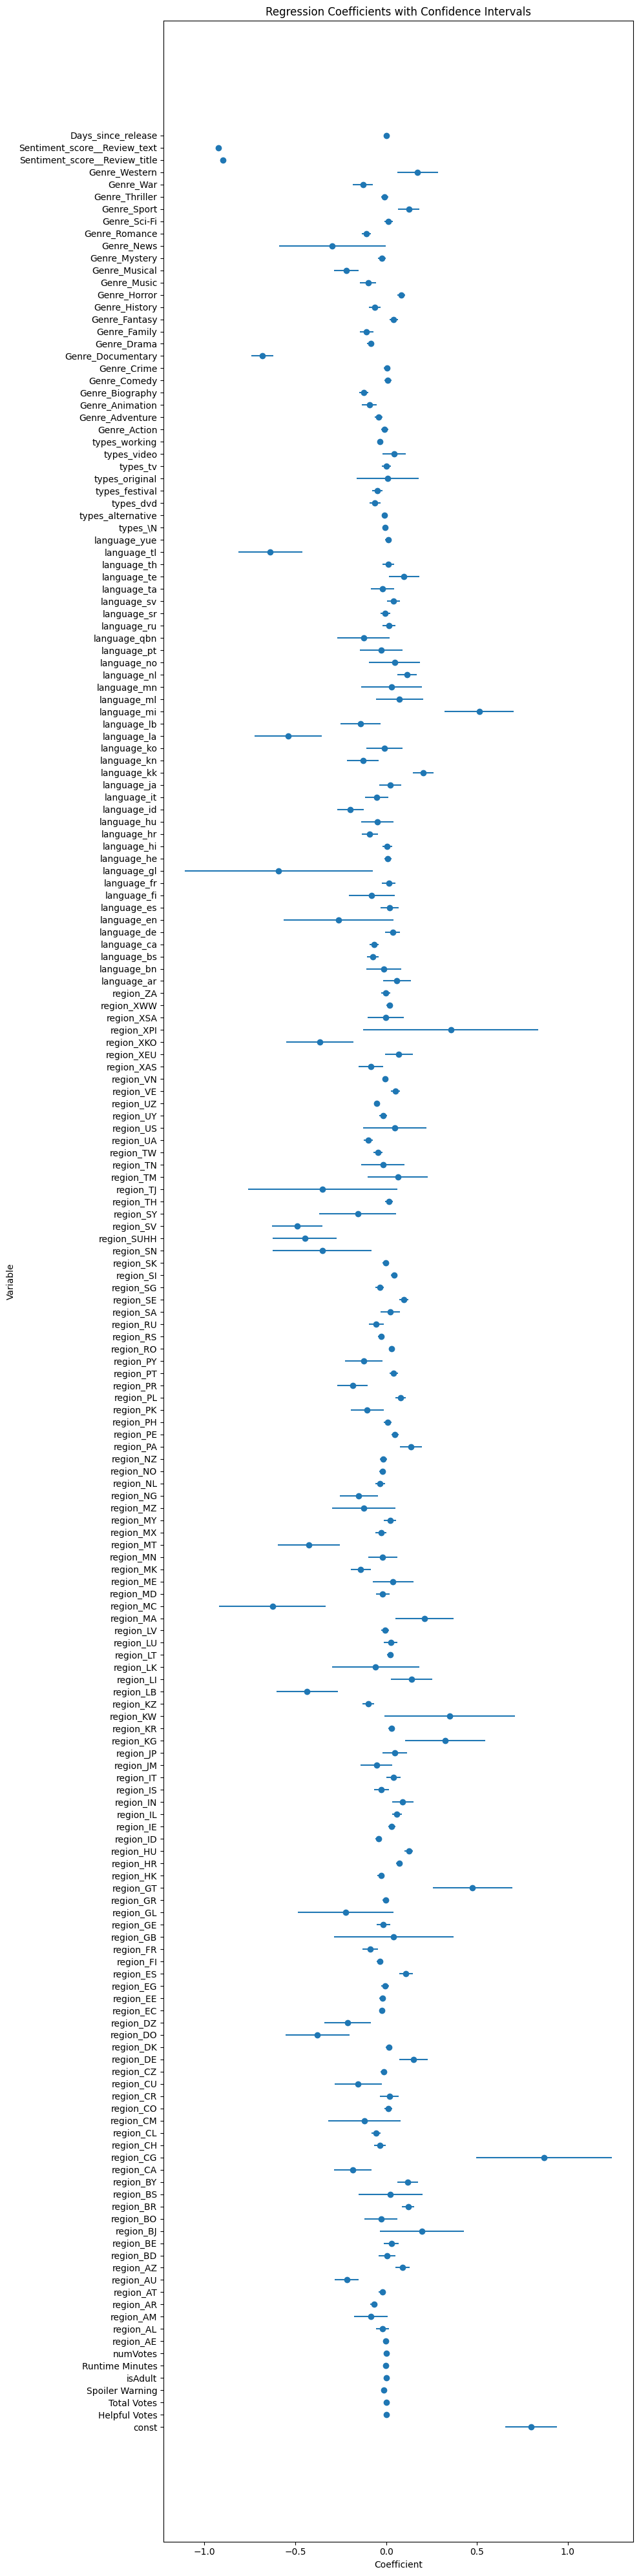

In [16]:
# import matplotlib.pyplot as plt

# # Extract coefficients and confidence intervals
# coef = results.params
# ci = results.conf_int(alpha=0.05)  # Specify the significance level (e.g., 0.05 for 95% CI)
# ci_lower = ci.iloc[:, 0]
# ci_upper = ci.iloc[:, 1]

# # Create the plot
# fig, ax = plt.subplots(figsize=(10, 40))
# ax.errorbar(coef, range(len(coef)), xerr=[coef - ci_lower, ci_upper - coef], fmt='o')
# ax.set_yticks(range(len(coef)))
# ax.set_yticklabels(results.params.index)

# # Customize the plot
# ax.set_xlabel('Coefficient')
# ax.set_ylabel('Variable')
# ax.set_title('Regression Coefficients with Confidence Intervals')

# # Adjust the plot layout
# fig.tight_layout()

# # Display the plot
# plt.show()

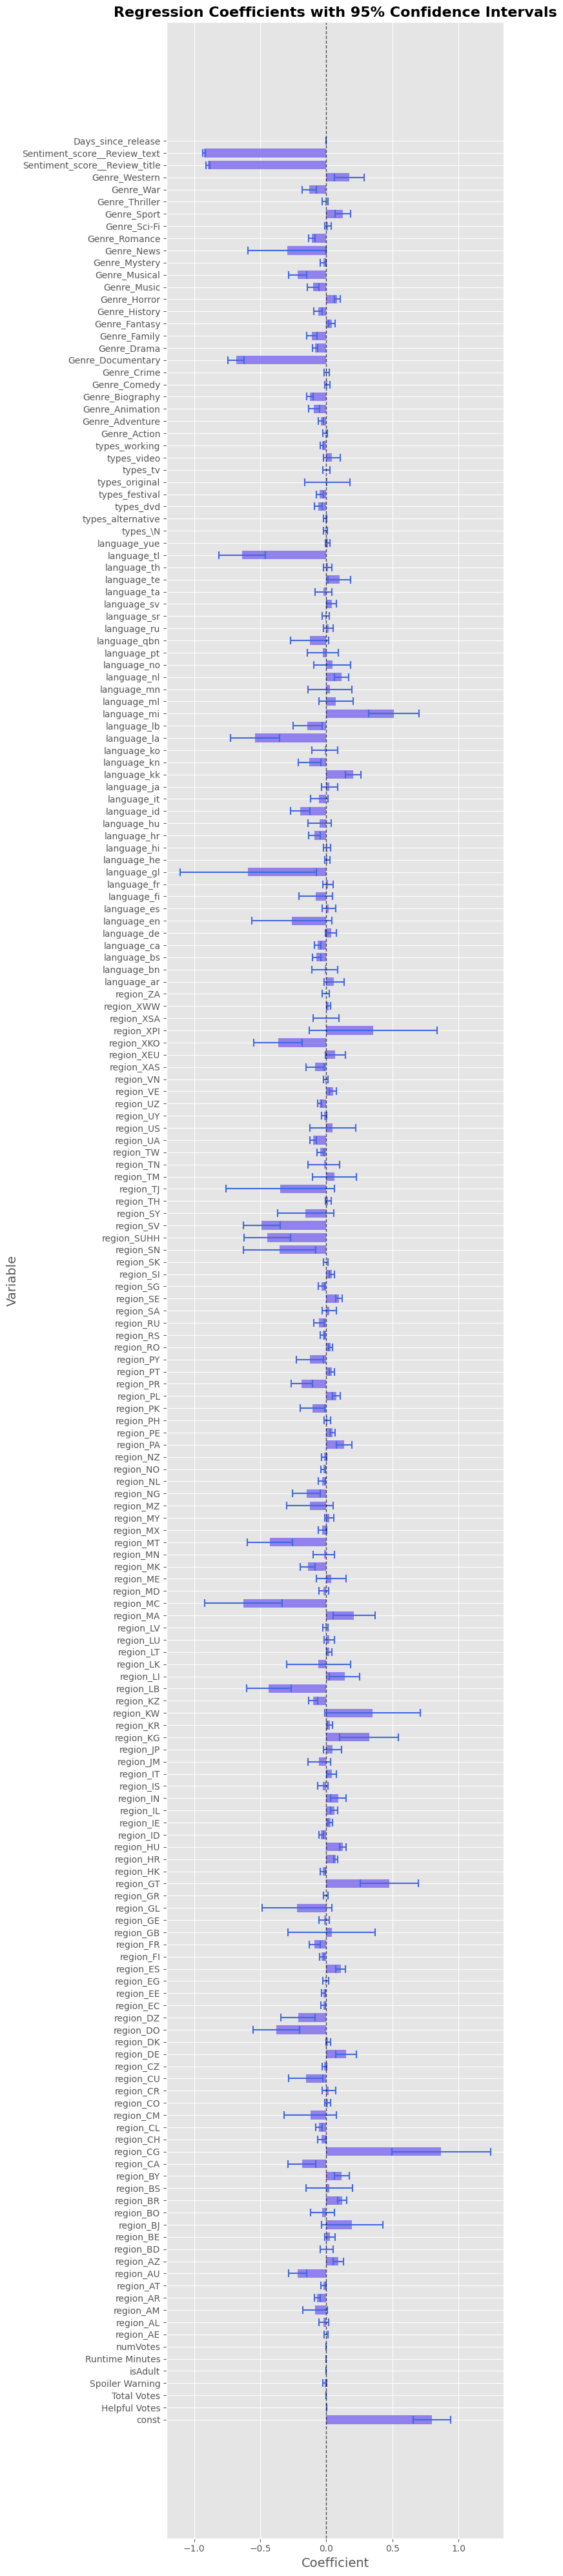

In [21]:
import matplotlib.pyplot as plt

# Extract coefficients and confidence intervals
coef = results.params
ci = results.conf_int(alpha=0.05)  
ci_lower = ci.iloc[:, 0]
ci_upper = ci.iloc[:, 1]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 40))

# Customize colors
color_bars = 'mediumslateblue'  # color for bars
color_ci = 'royalblue'  # color for confidence intervals

# Plot coefficients as bars
ax.barh(range(len(coef)), coef, color=color_bars, alpha=0.8, height=0.7)

# Plot confidence intervals as error bars
ax.errorbar(coef, range(len(coef)), xerr=[coef - ci_lower, ci_upper - coef], 
            fmt='none', ecolor=color_ci, capsize=4, capthick=1.5)

# Set x-axis limits with some padding
plt.xlim(min(ci_lower) - 0.1, max(ci_upper) + 0.1)

# Add vertical line at x=0
ax.axvline(x=0, color='black', linewidth=1, linestyle='--', alpha=0.7)

# Customize plot labels and titles
ax.set_yticks(range(len(coef)))
ax.set_yticklabels(results.params.index)
ax.set_xlabel('Coefficient', fontsize=14)
ax.set_ylabel('Variable', fontsize=14)
ax.set_title('Regression Coefficients with 95% Confidence Intervals', 
             fontsize=16, fontweight='bold')

# Customize plot style
plt.style.use('ggplot')  # set plot style
fig.tight_layout()  # adjust subplot params

# Display the plot
plt.show()